#  Estados del Continuo del Hidrógeno

Darío Mitnik

Resuelto por: Nicolas Unger


## Práctica 2

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Estática
sp.init_printing()
%matplotlib inline

#Definimos los simbolos que vamos a usar.
r = sp.Symbol('r',positive=True)
l = sp.Symbol('l',positive=True,integer=True)
z = sp.Symbol('z',positive=True,integer=True)
k = sp.Symbol('k',positive=True)   # k en lugar de n 

In [3]:
# Función Radial Hidrogénica -- Estados del Continuo (con hipergeométricas)

def R_analytic(k,l,z,r):
    
    a = z/k # Parámetro de Sommerfeld
     
    # Generalización al campo complejo
    nj = 1j*a  
    rho = -2*1j*k*r
   
    # Los continuos se normalizan de otra forma
    rnum = (2*z/nj)**3 * sp.gamma(nj+l+1)
    rden = (sp.gamma(2*l+2))**2 * 2*nj * sp.gamma(nj-l)
    rnorm = sp.sqrt(rnum/rden)

    rfunc = 1j**l * (rho)**l * sp.exp(-rho/2) * sp.hyper((-nj+l+1,),(2*l+2,),(rho))
    return rfunc

In [4]:
# Definición de los vectores a plotear
    
nsize = 1000
xmax = 20.0
xmin = 0.01
x = np.linspace(xmin,xmax,nsize)
psi = np.zeros(nsize,dtype=complex)

In [5]:
# Copiamos el array simbólico a numérico

# Variables de mi funcion
kq = 2.3
lq = 0
zq = 3

for i in range(nsize):
    psi[i]= R_analytic(kq,lq,zq,x[i]).evalf()
    
# Creo mi funcion de onda analytica
psi_analytic = R_analytic(kq,lq,zq,r)

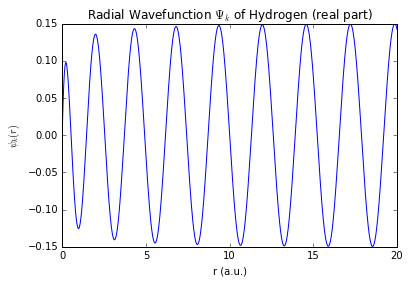

In [6]:
# Ploteo
plt.plot(x,x*psi.real);
plt.title("Radial Wavefunction $\Psi_{k}$ of Hydrogen (real part)");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");
plt.show()

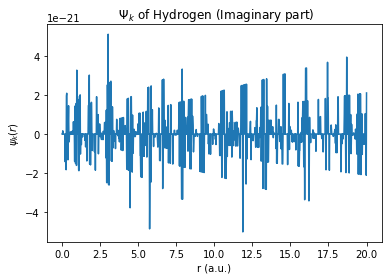

In [24]:
plt.plot(x,x*psi.imag);
plt.title(" $\Psi_{k}$ of Hydrogen (Imaginary part)");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");
plt.show()

## Chequeo ortonormalizacion de las funciones

In [25]:
# Normalizacion

#sp.integrate(sp.simplify((r*R_analytic(2.3,0,3,r))**2),(r,0,sp.oo)).evalf()
np.trapz(psi.real**2,x)

In [26]:
# Ortogonalidad

sp.integrate(sp.simplify(r * R_analytic(2.3,0,3,r) * r * R_analytic(3.3,0,3,r)), (r,0,50)).evalf()

### No parecen estar normalizado ni son ortogonales

## Condicion de Kato

In [27]:
kato1 = sp.diff(sp.re(psi_analytic),r).subs(r,0)
kato2 = sp.re(psi_analytic).subs(r,0)
kato1/kato2

    ⎛        ⎛ ┌─  ⎛2.0 - 1.30434782608696⋅ⅈ │  ⎞⎞         ⎛ ┌─  ⎛1.0 - 1.3043
1.0⋅⎜- 3.0⋅re⎜ ├─  ⎜                         │ 0⎟⎟ - 2.3⋅im⎜ ├─  ⎜            
    ⎝        ⎝1╵ 1 ⎝           3             │  ⎠⎠         ⎝1╵ 1 ⎝           2
──────────────────────────────────────────────────────────────────────────────
                                                      ⎛ ┌─  ⎛1.0 - 1.304347826
                                                    re⎜ ├─  ⎜                 
                                                      ⎝1╵ 1 ⎝           2     

4782608696⋅ⅈ │  ⎞⎞         ⎛ ┌─  ⎛2.0 - 1.30434782608696⋅ⅈ │  ⎞⎞⎞
             │ 0⎟⎟ + 2.3⋅im⎜ ├─  ⎜                         │ 0⎟⎟⎟
             │  ⎠⎠         ⎝1╵ 1 ⎝           3             │  ⎠⎠⎠
─────────────────────────────────────────────────────────────────
08696⋅ⅈ │  ⎞⎞                                                    
        │ 0⎟⎟                                                    
        │  ⎠⎠                                     

In [8]:
kato1 = (psi.real[1]-psi.real[0]) / x[1]-x[0]
kato1

In [9]:
kato2 = psi.real[0]
kato2

In [10]:
kato1/kato2

No logro hacer que me ignore la parte compleja..

## Grafico de tres funciones con energias parecidas

In [28]:
psi1 = np.zeros(nsize,dtype=complex)
psi2 = np.zeros(nsize,dtype=complex)
psi3 = np.zeros(nsize,dtype=complex)

for i in range(nsize):
    psi1[i]= R_analytic(2.3,0,3,x[i]).evalf()
    psi2[i]= R_analytic(2.8,0,3,x[i]).evalf()
    psi3[i]= R_analytic(3.3,0,3,x[i]).evalf()

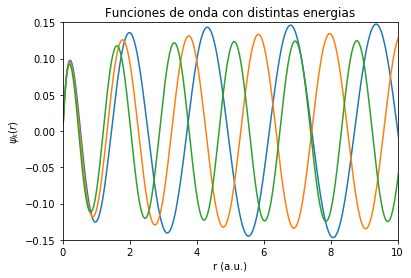

In [29]:
# Ploteo
plt.plot(x,x*psi1.real);
plt.plot(x,x*psi2.real);
plt.plot(x,x*psi3.real);
plt.axis([0,10,-0.15,0.15])
plt.title("Funciones de onda con distintas energias");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");